In [28]:
# Install necessary libraries if not already installed
# This is added to fix the ModuleNotFoundError for 'yellowbrick'
try:
    import yellowbrick
except ImportError:
    print("Installing yellowbrick...")
    !pip install yellowbrick
    print("yellowbrick installed successfully.")

Installing yellowbrick...
Defaulting to user installation because normal site-packages is not writeable
yellowbrick installed successfully.


In [29]:
# 1. Initial data inspection and data cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
try:
    df = pd.read_csv('rolling_stones_spotify.csv')
except FileNotFoundError:
    print("Error: 'spotify_rolling_stones.csv' not found.")
    print("Please ensure the dataset is in the same directory as this notebook or provide the correct path.")

In [10]:
print("--- Initial Data Inspection ---")
print("First 5 rows of the dataset:")
print(df.head())



--- Initial Data Inspection ---
First 5 rows of the dataset:
   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piG

In [11]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        16

In [12]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.99400

In [13]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")


Number of duplicate rows: 0


In [14]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())
# For this dataset, it's unlikely to have missing values in the given features.
# If there were, strategies like imputation (mean, median, mode) or row removal would be applied.


Missing values per column:
Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


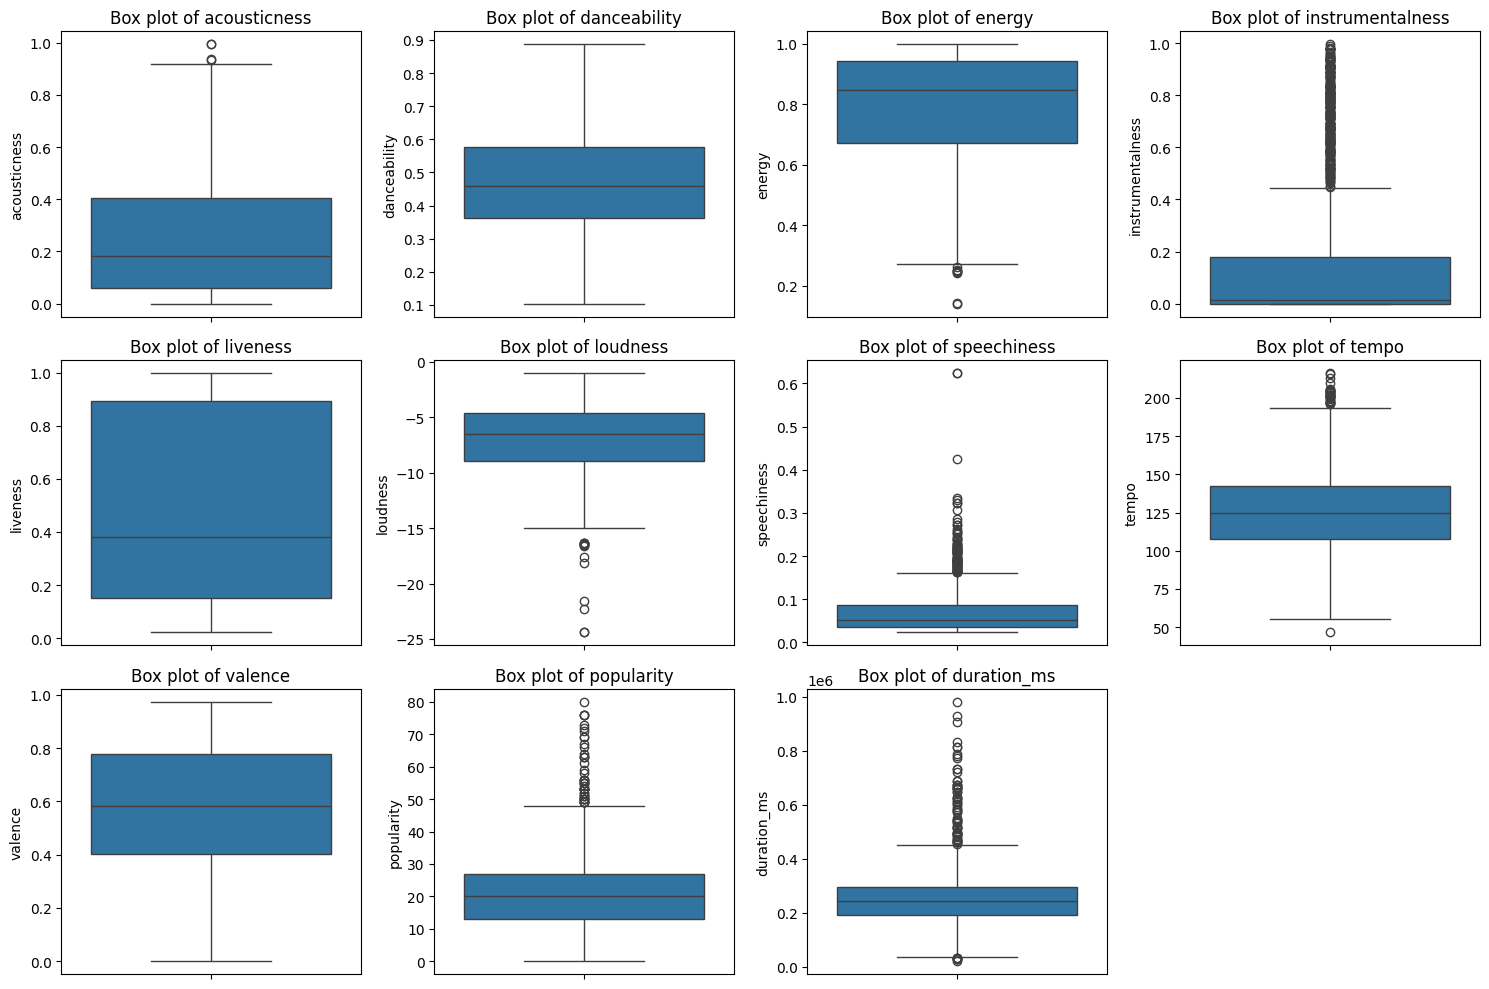

In [15]:
# Rectify erroneous entries or outliers (visual inspection and statistical methods)
# For numerical features, we can use box plots to identify potential outliers.
numerical_features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
    'popularity', 'duration_ms'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [16]:
# Based on box plots, decide on outlier treatment if necessary.
# For example, for 'loudness' which is in dB, values typically range from -60 to 0.
# If there are values outside this range, they might be erroneous.
# For other features (0.0 to 1.0), values outside this range would be erroneous.
# For 'tempo' and 'duration_ms', extreme values might be outliers.

# Example: Correcting values outside expected ranges (hypothetical)
for feature in ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']:
    if ((df[feature] < 0.0) | (df[feature] > 1.0)).any():
        print(f"Warning: {feature} contains values outside [0.0, 1.0]. Capping them.")
        df[feature] = np.clip(df[feature], 0.0, 1.0)

# For loudness, which typically ranges from -60 to 0 dB
if ((df['loudness'] < -60.0) | (df['loudness'] > 0.0)).any():
    print("Warning: Loudness contains values outside [-60.0, 0.0] dB. Capping them.")
    df['loudness'] = np.clip(df['loudness'], -60.0, 0.0)

In [ ]:
# 2. Refine the data for further processing based on your findings

# Convert 'release_date' to datetime objects
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract 'release_year' from 'release_date' for time-based analysis
df['release_year'] = df['release_date'].dt.year

# Drop irrelevant entries: 'id', 'uri', 'track_number' as they are identifiers or order-related, not musical features.
# 'name' and 'album' are categorical and useful for analysis, but not for clustering numerical features directly.
columns_to_drop = ['id', 'uri', 'track_number', 'release_date']
df_processed = df.drop(columns=columns_to_drop)

print("\n--- Data Refinement ---")
print("Columns after dropping irrelevant ones:")
print(df_processed.columns)
print("\nFirst 5 rows of the refined DataFrame:")
print(df_processed.head())


--- Data Refinement ---
Columns after dropping irrelevant ones:
Index(['Unnamed: 0', 'name', 'album', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms', 'release_year'],
      dtype='object')

First 5 rows of the refined DataFrame:
   Unnamed: 0                         name               album  acousticness  \
0           0   Concert Intro Music - Live  Licked Live In NYC        0.0824   
1           1   Street Fighting Man - Live  Licked Live In NYC        0.4370   
2           2           Start Me Up - Live  Licked Live In NYC        0.4160   
3           3  If You Can't Rock Me - Live  Licked Live In NYC        0.5670   
4           4            Don’t Stop - Live  Licked Live In NYC        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.996000     0.932   -12.913       0.1100   
1         0.326  


--- Albums with most popular songs (Popularity > 70) ---
album
Let It Bleed                                  1
Aftermath                                     1
Beggars Banquet (50th Anniversary Edition)    1
Tattoo You (2009 Re-Mastered)                 1
Some Girls                                    1
                                             ..
Flashpoint                                    0
Exile On Main Street (Deluxe Version)         0
Exile On Main Street (Bonus Track Version)    0
Exile On Main Street (2010 Re-Mastered)       0
got LIVE if you want it!                      0
Name: is_popular, Length: 90, dtype: int64


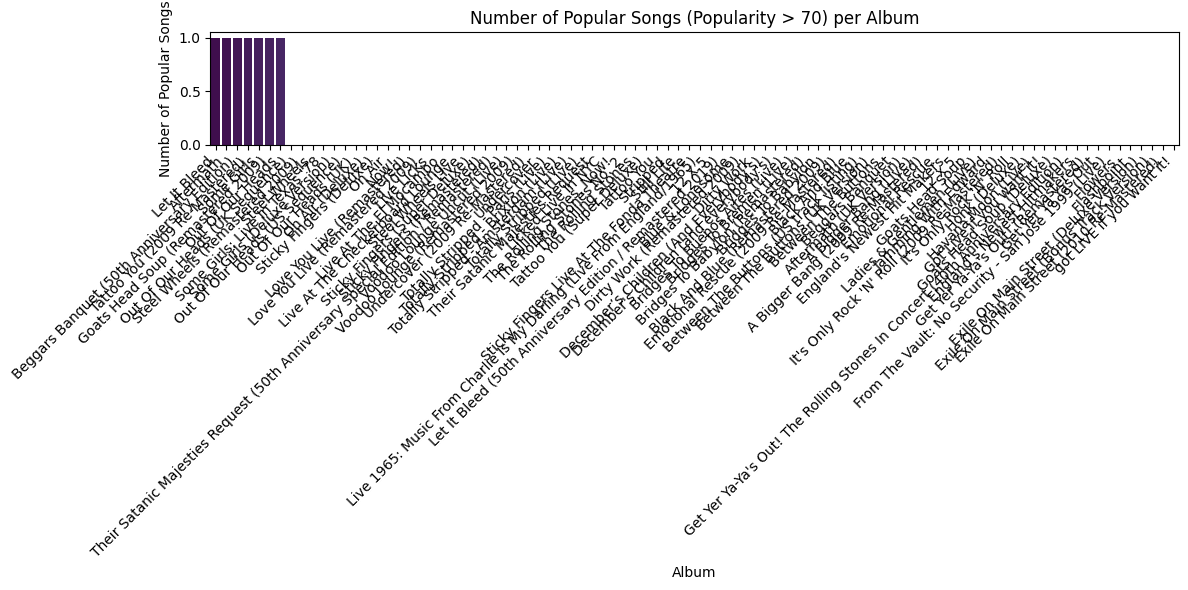


Based on the analysis, the top two albums to recommend are:
1. Let It Bleed with 1 popular songs.
2. Aftermath with 1 popular songs.


In [21]:
# 3. Perform exploratory data analysis and feature engineering

# 3a. Utilize suitable visualizations to identify the two albums that should be
#     recommended to anyone based on the number of popular songs in each album.
#     Define 'popular song' as having popularity > 70 (arbitrary threshold, can be adjusted).

POPULARITY_THRESHOLD = 70
df_processed['is_popular'] = df_processed['popularity'] > POPULARITY_THRESHOLD

popular_songs_per_album = df_processed.groupby('album')['is_popular'].sum().sort_values(ascending=False)

print(f"\n--- Albums with most popular songs (Popularity > {POPULARITY_THRESHOLD}) ---")
print(popular_songs_per_album)

plt.figure(figsize=(12, 6))
# Fix for FutureWarning: Pass `x` to `hue` and set `legend=False`
sns.barplot(x=popular_songs_per_album.index, y=popular_songs_per_album.values, palette='viridis',
            hue=popular_songs_per_album.index, legend=False)
plt.title(f'Number of Popular Songs (Popularity > {POPULARITY_THRESHOLD}) per Album')
plt.xlabel('Album')
plt.ylabel('Number of Popular Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nBased on the analysis, the top two albums to recommend are:")
for i in range(min(2, len(popular_songs_per_album))):
    print(f"{i+1}. {popular_songs_per_album.index[i]} with {int(popular_songs_per_album.values[i])} popular songs.")


--- Exploratory Data Analysis of Song Features ---


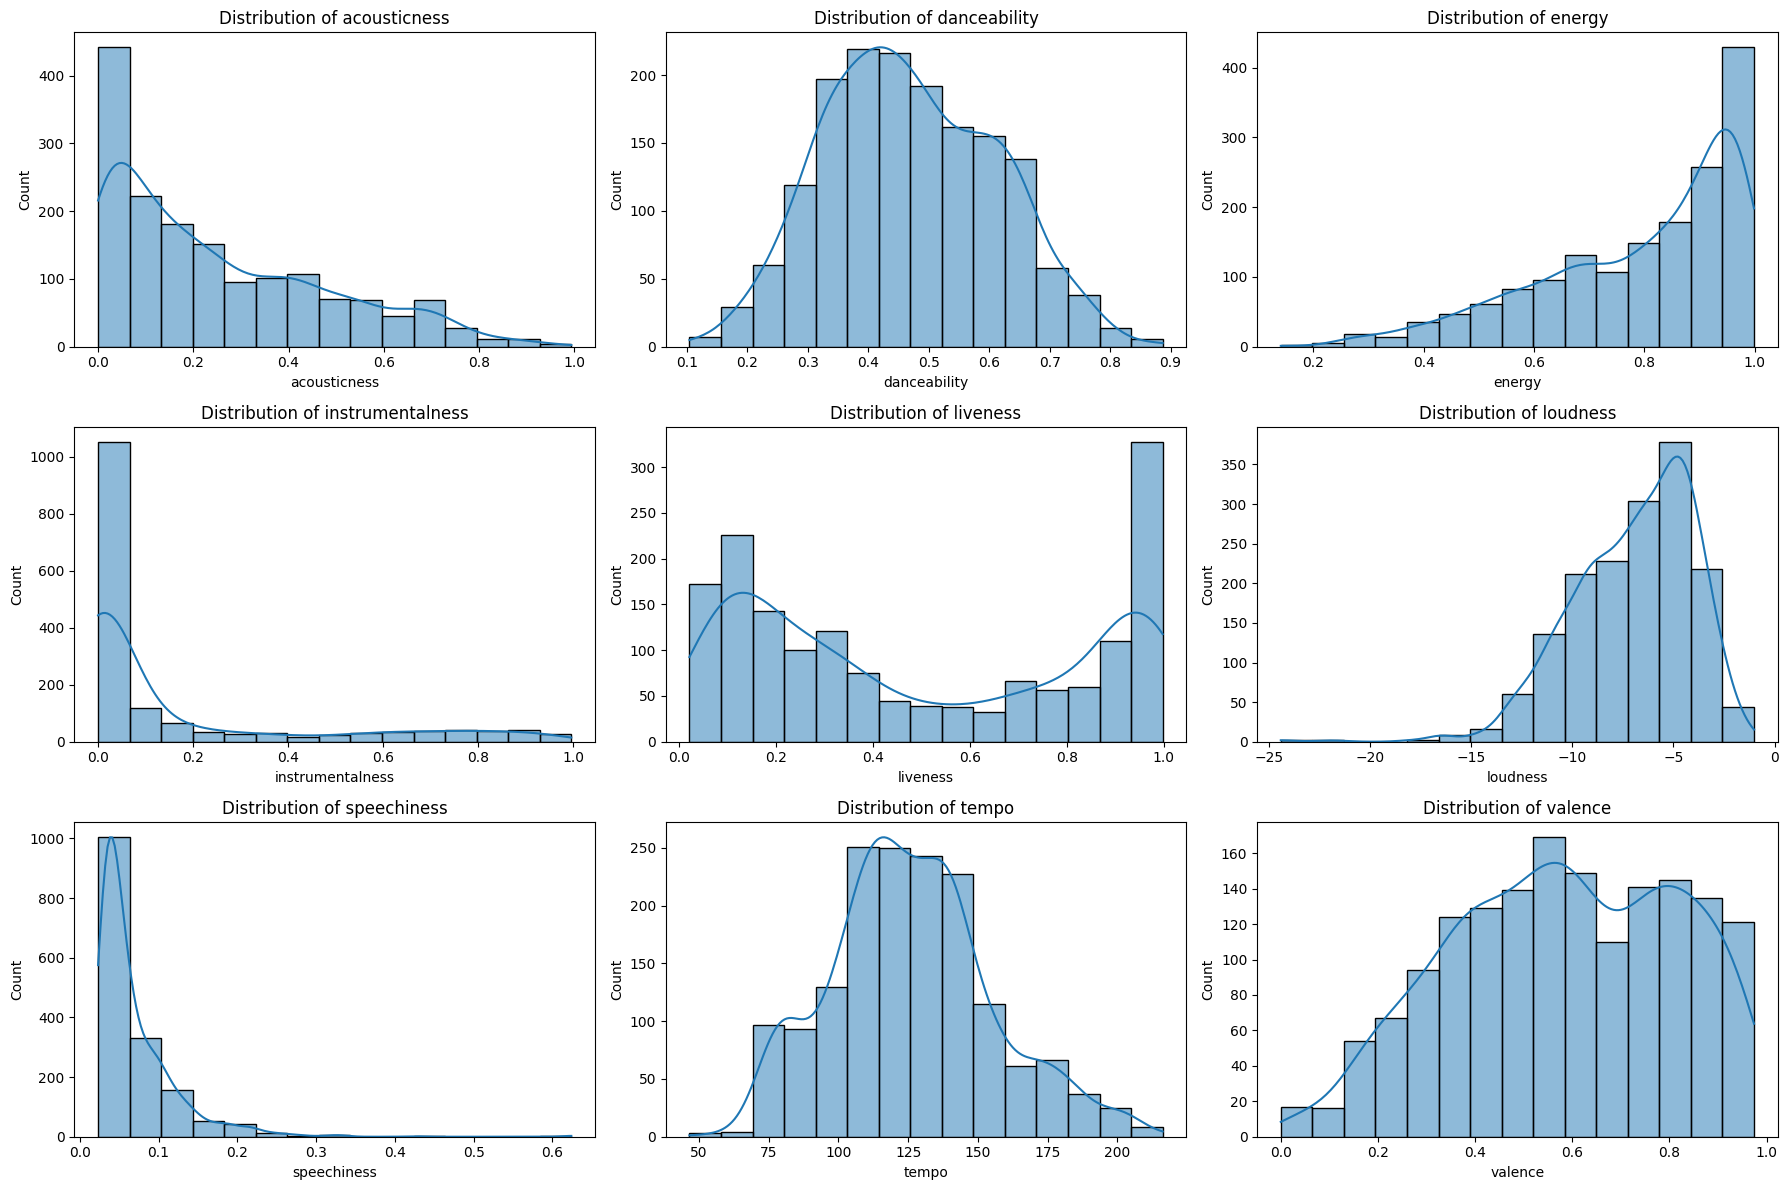

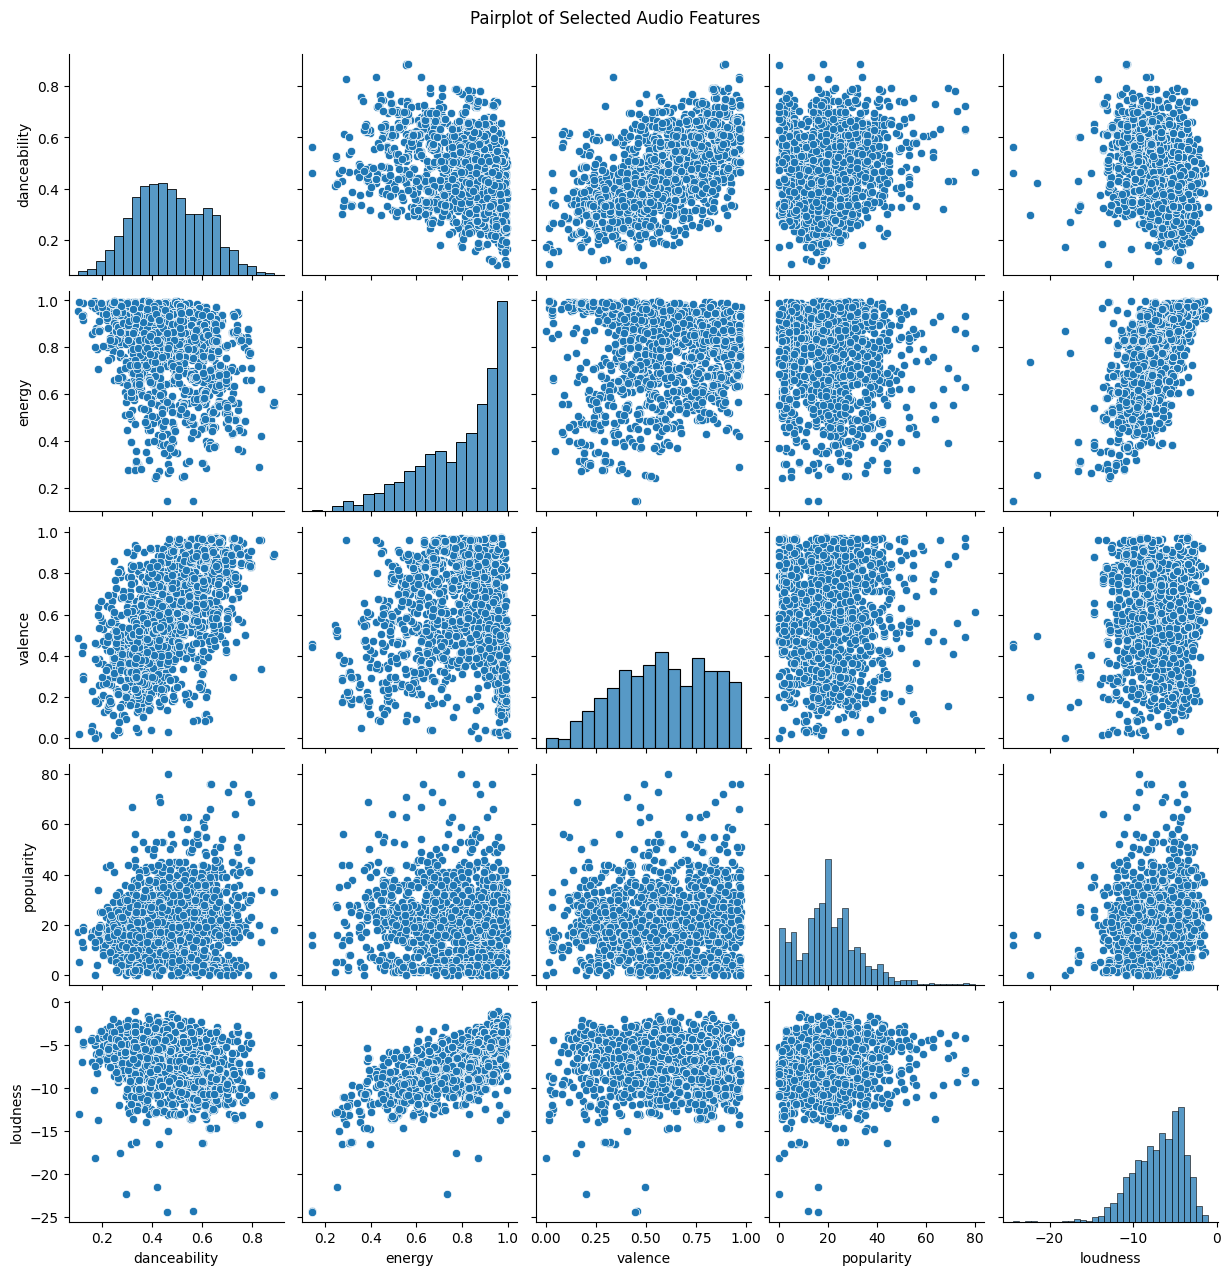

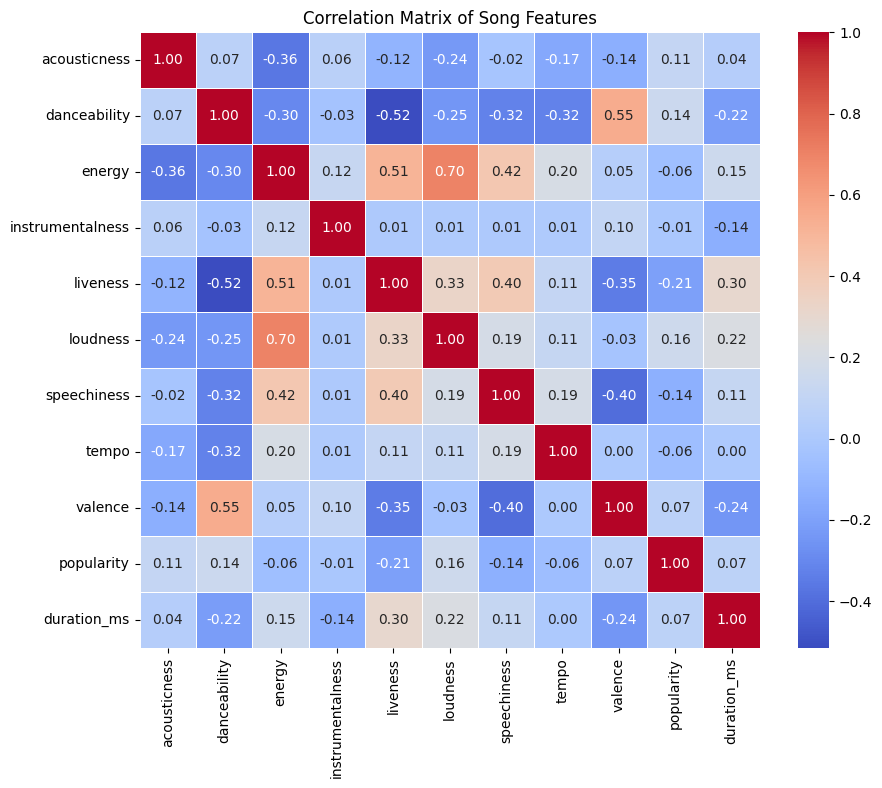


Correlation Matrix:
                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000      0.070017 -0.363819          0.061403   
danceability          0.070017      1.000000 -0.300536         -0.031812   
energy               -0.363819     -0.300536  1.000000          0.120261   
instrumentalness      0.061403     -0.031812  0.120261          1.000000   
liveness             -0.117739     -0.516387  0.511188          0.008873   
loudness             -0.237083     -0.249406  0.698039          0.012524   
speechiness          -0.021774     -0.322684  0.417214          0.009586   
tempo                -0.171003     -0.324398  0.201885          0.010961   
valence              -0.138803      0.546210  0.046217          0.103480   
popularity            0.108046      0.141205 -0.057272         -0.010612   
duration_ms           0.039128     -0.220045  0.148876         -0.137599   

                  liveness  loudness  speechiness     tempo   vale

In [22]:
# 3b. Conduct exploratory data analysis to delve into various features of songs,
#     aiming to identify patterns.

print("\n--- Exploratory Data Analysis of Song Features ---")

# Distribution of key audio features
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features[:-2]): # Exclude popularity and duration_ms for this specific plot
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_processed[col], kde=True, bins=15)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Pairplot for relationships between a few key features
# Limiting to a few features to avoid too many plots
selected_features_for_pairplot = ['danceability', 'energy', 'valence', 'popularity', 'loudness']
sns.pairplot(df_processed[selected_features_for_pairplot])
plt.suptitle('Pairplot of Selected Audio Features', y=1.02)
plt.show()

# Correlation matrix of numerical features
correlation_matrix = df_processed[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Song Features')
plt.show()
print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nObservations from EDA:")
print("- Histograms show the distribution of each feature. For example, 'loudness' might show a normal-like distribution, while 'instrumentalness' might be skewed towards 0 (most songs have vocals).")
print("- Pairplots help visualize relationships between pairs of features. For instance, 'energy' and 'loudness' are often positively correlated.")
print("- The correlation matrix quantifies these relationships. High positive/negative values indicate strong correlations.")



--- Popularity Analysis ---

Correlation of Popularity with other features:
popularity          1.000000
loudness            0.156323
danceability        0.141205
acousticness        0.108046
duration_ms         0.074102
valence             0.065333
instrumentalness   -0.010612
energy             -0.057272
tempo              -0.061061
speechiness        -0.136745
liveness           -0.205845
Name: popularity, dtype: float64


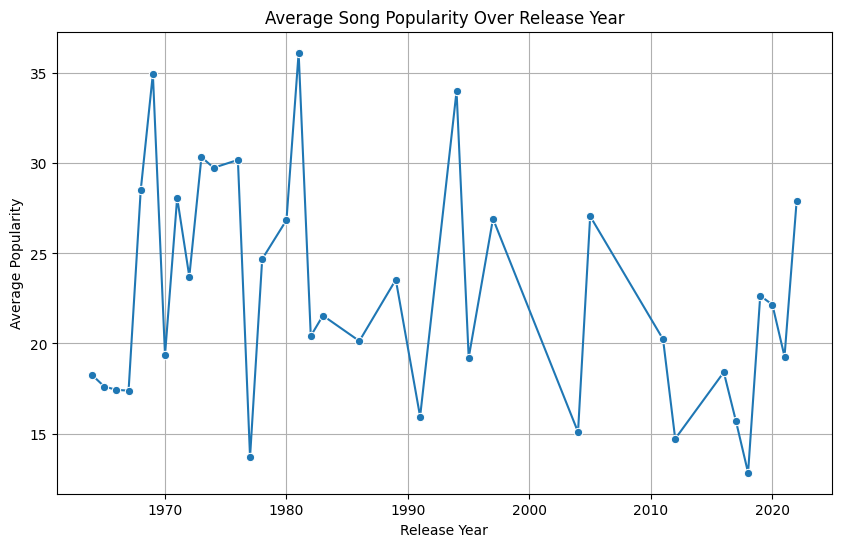


Insights on Popularity:
- The correlation values indicate which features tend to increase or decrease with popularity.
- The line plot of average popularity over release year can reveal trends. For example, older songs might have lower average popularity on Spotify due to less streaming, or certain eras might have produced more popular tracks.


In [23]:
# 3c. Examine the relationship between a song's popularity and various factors,
#     exploring how this correlation has evolved.

print("\n--- Popularity Analysis ---")

# Correlation of popularity with other numerical features
popularity_correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print("\nCorrelation of Popularity with other features:")
print(popularity_correlations)

# Popularity trend over release year
avg_popularity_by_year = df_processed.groupby('release_year')['popularity'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_popularity_by_year.index, y=avg_popularity_by_year.values, marker='o')
plt.title('Average Song Popularity Over Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

print("\nInsights on Popularity:")
print("- The correlation values indicate which features tend to increase or decrease with popularity.")
print("- The line plot of average popularity over release year can reveal trends. For example, older songs might have lower average popularity on Spotify due to less streaming, or certain eras might have produced more popular tracks.")

In [24]:
# 3d. Provide insights on the significance of dimensionality reduction techniques.
#     Share your ideas and elucidate your observations.

print("\n--- Significance of Dimensionality Reduction Techniques ---")
print("Dimensionality reduction techniques like Principal Component Analysis (PCA) are crucial in data science for several reasons:")
print("1.  **Simplification and Visualization**: High-dimensional data is difficult to visualize and understand. PCA transforms data into a lower-dimensional space (e.g., 2D or 3D) while retaining most of the variance, making it easier to plot and identify patterns or clusters.")
print("2.  **Noise Reduction**: By focusing on the components that explain the most variance, PCA can effectively filter out noise in the data, leading to a cleaner representation.")
print("3.  **Improved Model Performance**: Many machine learning algorithms perform better with fewer features, especially when features are highly correlated. Reducing dimensionality can prevent overfitting and improve generalization.")
print("4.  **Reduced Computational Cost**: Training models on fewer features requires less computational power and time.")
print("5.  **Multicollinearity Handling**: PCA creates new orthogonal (uncorrelated) features (principal components), which helps address multicollinearity issues that can affect regression models.")
print("\nObservations from applying PCA to song features:")
print("When applied to song features (like acousticness, danceability, energy, etc.), PCA can help us:")
print("- Identify the underlying 'dimensions' or combinations of features that best explain the differences between songs. For instance, one principal component might represent a 'high energy, fast tempo' axis, while another might represent 'acoustic, low valence' characteristics.")
print("- Visualize song clusters more effectively in a 2D or 3D plot, where each point is a song and its position is determined by its principal component scores. This allows for a quick visual assessment of how well songs group together based on their audio characteristics.")
print("- Reduce the number of features fed into clustering algorithms, potentially leading to more robust and interpretable clusters, especially if some original features are redundant.")



--- Significance of Dimensionality Reduction Techniques ---
Dimensionality reduction techniques like Principal Component Analysis (PCA) are crucial in data science for several reasons:
1.  **Simplification and Visualization**: High-dimensional data is difficult to visualize and understand. PCA transforms data into a lower-dimensional space (e.g., 2D or 3D) while retaining most of the variance, making it easier to plot and identify patterns or clusters.
2.  **Noise Reduction**: By focusing on the components that explain the most variance, PCA can effectively filter out noise in the data, leading to a cleaner representation.
3.  **Improved Model Performance**: Many machine learning algorithms perform better with fewer features, especially when features are highly correlated. Reducing dimensionality can prevent overfitting and improve generalization.
4.  **Reduced Computational Cost**: Training models on fewer features requires less computational power and time.
5.  **Multicollinearity H

In [25]:
# 4. Perform cluster analysis

# Prepare data for clustering: Select numerical features and scale them.
features_for_clustering = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
    'popularity', 'duration_ms'
]
X = df_processed[features_for_clustering].copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

print("\n--- Cluster Analysis ---")
print("Scaled data for clustering (first 5 rows):")
print(X_scaled_df.head())


--- Cluster Analysis ---
Scaled data for clustering (first 5 rows):
   acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0     -0.739355     -0.041343  1.115764          3.012099  1.261552 -1.985045   
1      0.820518     -1.007963  0.960062          0.249238  1.344648  0.724545   
2      0.728140     -0.584626  0.982305          0.853953  1.330321  0.680109   
3      1.392383     -0.704571  1.071278         -0.594080  1.155532  0.479980   
4      0.657756     -1.170242  0.982305         -0.392050  1.358975  0.625984   

   speechiness     tempo   valence  popularity  duration_ms  
0     0.784410 -0.276517 -2.387590    0.982999    -1.930719  
1     0.123753  0.183852 -1.142678    1.063495    -0.042138  
2     0.881280  0.136323 -1.164306    1.063495     0.050079  
3     2.392459  0.236514 -1.882359    0.902504     0.444539  
4     0.455050  0.152303 -1.627147    0.902504     0.437392  


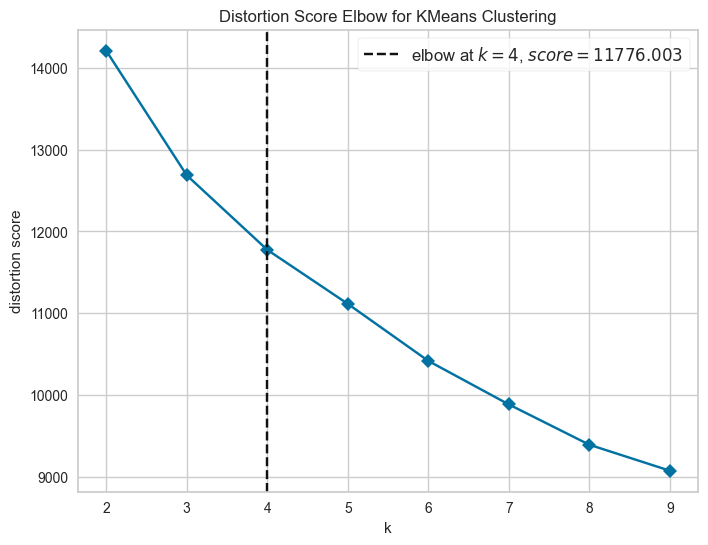

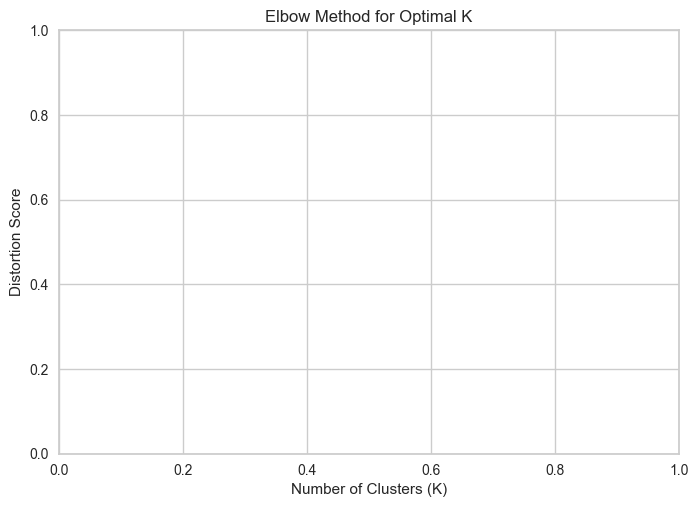


Based on the Elbow method, the optimal number of clusters appears to be K = 4.


In [30]:
# 4a. Identify the right number of clusters using the Elbow method

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42, n_init=10) # n_init to suppress warning
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False) # Test k from 2 to 9

plt.figure(figsize=(8, 6))
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion Score')
plt.show()

# Based on the elbow plot, choose the optimal number of clusters.
# Let's assume the elbow is at K=3 or K=4 for demonstration.
# You should interpret your own plot to decide.
optimal_k = 4 # Example: Adjust based on your Elbow plot

print(f"\nBased on the Elbow method, the optimal number of clusters appears to be K = {optimal_k}.")


K-Means clustering performed with 4 clusters.
Number of songs per cluster:
cluster
0    362
1    422
2    281
3    545
Name: count, dtype: int64


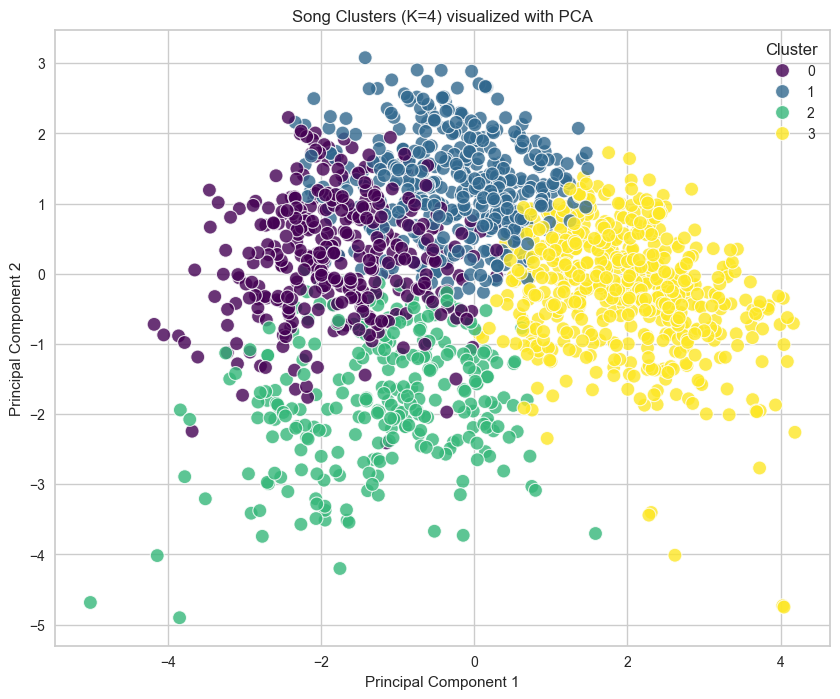

In [31]:
# 4b. Use appropriate clustering algorithms (K-Means)

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_processed['cluster'] = kmeans.fit_predict(X_scaled)

print(f"\nK-Means clustering performed with {optimal_k} clusters.")
print("Number of songs per cluster:")
print(df_processed['cluster'].value_counts().sort_index())

# Optionally, visualize clusters using PCA for 2D representation
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df_processed['cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
plt.title(f'Song Clusters (K={optimal_k}) visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)


--- Cluster Definitions (Mean of Original Features) ---
         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.212201      0.590086  0.669417          0.183088  0.232928   
1            0.189662      0.521806  0.878566          0.220762  0.372886   
2            0.509653      0.454377  0.564185          0.075446  0.323836   
3            0.189354      0.354809  0.924894          0.153529  0.842218   

         loudness  speechiness       tempo   valence  popularity  \
cluster                                                            
0       -9.878453     0.047581  122.647500  0.755978   15.060773   
1       -4.995088     0.051948  123.777069  0.748251   27.755924   
2       -9.101644     0.047022  110.496804  0.393184   25.177936   
3       -5.473048     0.109276  138.183767  0.435552   16.933945   

           duration_ms  
cluster                 
0        187121.21823

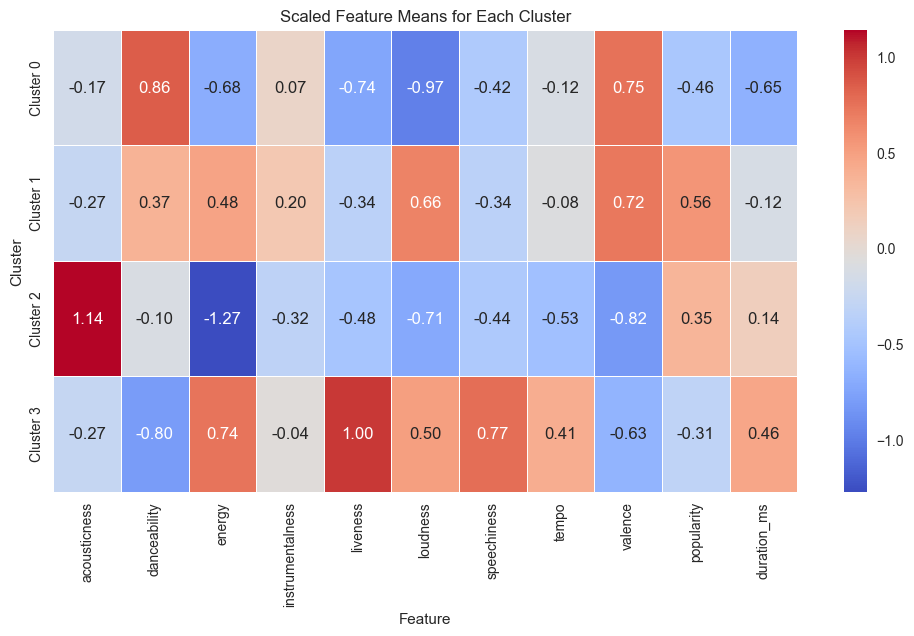


--- Interpretation of Clusters ---

Cluster 0:
Average acousticness (Avg: 0.21), High danceability (Avg: 0.59), Low energy (Avg: 0.67), Average instrumentalness (Avg: 0.18), Low liveness (Avg: 0.23), Low loudness (Avg: -9.88), Average speechiness (Avg: 0.05), Average tempo (Avg: 122.65), High valence (Avg: 0.76), Average popularity (Avg: 15.06), Low duration_ms (Avg: 187121.22)

Cluster 1:
Average acousticness (Avg: 0.19), Average danceability (Avg: 0.52), Average energy (Avg: 0.88), Average instrumentalness (Avg: 0.22), Average liveness (Avg: 0.37), High loudness (Avg: -5.00), Average speechiness (Avg: 0.05), Average tempo (Avg: 123.78), High valence (Avg: 0.75), High popularity (Avg: 27.76), Average duration_ms (Avg: 244225.84)

Cluster 2:
High acousticness (Avg: 0.51), Average danceability (Avg: 0.45), Low energy (Avg: 0.56), Average instrumentalness (Avg: 0.08), Average liveness (Avg: 0.32), Low loudness (Avg: -9.10), Average speechiness (Avg: 0.05), Low tempo (Avg: 110.50), Low v

In [33]:
# 4c. Define each cluster based on the features

cluster_centers_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=features_for_clustering)

# To interpret, it's often helpful to inverse transform the scaled centers or
# look at the mean of original (unscaled) features for each cluster.
cluster_means = df_processed.groupby('cluster')[features_for_clustering].mean()

print("\n--- Cluster Definitions (Mean of Original Features) ---")
print(cluster_means)

# Visualize cluster characteristics (e.g., using a heatmap of scaled cluster centers)
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_centers_scaled, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            yticklabels=[f'Cluster {i}' for i in range(optimal_k)])
plt.title('Scaled Feature Means for Each Cluster')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

print("\n--- Interpretation of Clusters ---")
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    cluster_description = []
    for feature in features_for_clustering:
        mean_val = cluster_means.loc[i, feature]
        scaled_val = cluster_centers_scaled.loc[i, feature]

        # Provide a qualitative description based on scaled values (relative to mean)
        if scaled_val > 0.5:
            description = "High"
        elif scaled_val < -0.5:
            description = "Low"
        else:
            description = "Average"

        cluster_description.append(f"{description} {feature} (Avg: {mean_val:.2f})")
    print(", ".join(cluster_description))

print("\nExample interpretation for a hypothetical Cluster X:")
print("If Cluster X has 'High danceability', 'High energy', 'Low acousticness', and 'High popularity',")
print("this cluster might represent 'Upbeat, popular, non-acoustic tracks'.")
print("You would analyze the mean values for each feature within each cluster to derive similar descriptions.")

print("\n--- Cohort Creation Summary ---")
print("By performing this cluster analysis, we have successfully grouped songs into distinct cohorts based on their audio features.")
print("These cohorts can now be used to:")
print("- Provide more personalized song recommendations to users who enjoy a specific type of music (e.g., recommend songs from 'Upbeat Dance' cohort to users who frequently listen to songs in that cohort).")
print("- Understand the musical characteristics of different song groups within the Rolling Stones' discography.")
print("- Identify gaps or strengths in their music catalog based on these defined cohorts.")

